# ต้องใช้ bias and variance เพราะมี training, testing

In [48]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise
import utils


In [49]:
# #Load training data
# data_train = np.loadtxt(r'D:\M.eng\Machine learning\ML_test_byme\data\LogisticRegressionDataTrain.txt')
# Xval = data_train[:, :7]
# yval = data_train[:,7]
# data_test = np.loadtxt(r'D:\M.eng\Machine learning\ML_test_byme\data\LogisticRegressionDataTrain.txt')
# Xtest = data_test[:, :7]
# ytest = data_test[:,7]
# # m = Number of examples
# m = yval.size
# # Plot training data
# plt.plot(Xval[:, :2], yval, 'ro', ms = 10, mec = 'k', mew = 1)
# plt.xlabel('Change in water level (x)')
# plt.ylabel('Water flowing out of the dam (y)')
# plt.show()

In [50]:
data_train = np.loadtxt(r'D:\M.eng\Machine learning\ML_test_byme\data\LogisticRegressionDataTrain.txt')
X = data_train[:, :7]
y = data_train[:,7]


In [51]:
X

array([[1.21980000e+04, 4.32027008e+02, 1.76995438e+02, ...,
        8.65797043e-01, 1.24000000e+04, 7.49493062e-01],
       [1.20950000e+04, 4.44033997e+02, 1.86067673e+02, ...,
        8.92816246e-01, 1.22900000e+04, 6.99942112e-01],
       [1.18900000e+04, 4.34026001e+02, 1.78189774e+02, ...,
        8.77824187e-01, 1.21320000e+04, 7.15920031e-01],
       ...,
       [1.09620000e+04, 4.18661011e+02, 1.71638901e+02, ...,
        8.75948906e-01, 1.12580000e+04, 7.16470599e-01],
       [1.40920000e+04, 4.99416992e+02, 2.10963013e+02, ...,
        9.11440909e-01, 1.46180000e+04, 7.72926748e-01],
       [1.13590000e+04, 4.20872009e+02, 1.70854721e+02, ...,
        8.66066217e-01, 1.15800000e+04, 6.17471218e-01]], shape=(2600, 7))

In [52]:
y

array([1., 1., 1., ..., 1., 0., 1.], shape=(2600,))

<blockquote> plot data

In [53]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (m, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    fig = plt.figure()

    # ====================== YOUR CODE HERE ======================
    pos = y == 1
    neg = y == 0

    # Plot Examples
    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    # plt.show()
    
    # ============================================================

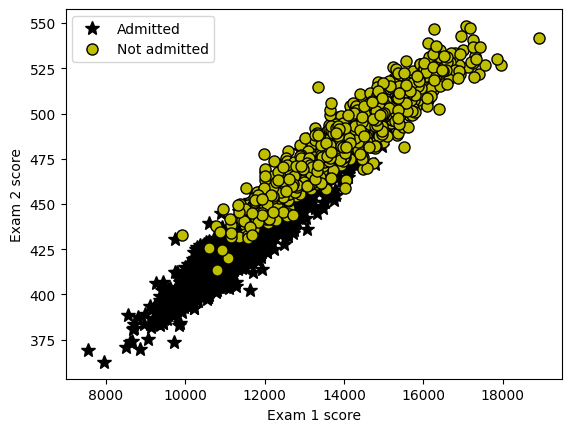

In [54]:
plotData(X, y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])
plt.show()

<blockquote>Sigmoid function

In [55]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================
    g = 1/(1+ np.exp(-z)) #sigmoid function
    

    # =============================================================
    return g

In [56]:
# Test the implementation of sigmoid function here
z = -6
g = sigmoid(z)

print('g(', z, ') = ', g)

g( -6 ) =  0.0024726231566347743


In [57]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1) #ประกบตาม vector/metrix ตามแนว column ทำให้ขนาดไม่เปลี่ยน

In [58]:
X

array([[1.00000000e+00, 1.21980000e+04, 4.32027008e+02, ...,
        8.65797043e-01, 1.24000000e+04, 7.49493062e-01],
       [1.00000000e+00, 1.20950000e+04, 4.44033997e+02, ...,
        8.92816246e-01, 1.22900000e+04, 6.99942112e-01],
       [1.00000000e+00, 1.18900000e+04, 4.34026001e+02, ...,
        8.77824187e-01, 1.21320000e+04, 7.15920031e-01],
       ...,
       [1.00000000e+00, 1.09620000e+04, 4.18661011e+02, ...,
        8.75948906e-01, 1.12580000e+04, 7.16470599e-01],
       [1.00000000e+00, 1.40920000e+04, 4.99416992e+02, ...,
        9.11440909e-01, 1.46180000e+04, 7.72926748e-01],
       [1.00000000e+00, 1.13590000e+04, 4.20872009e+02, ...,
        8.66066217e-01, 1.15800000e+04, 6.17471218e-01]], shape=(2600, 8))

<blockquote>Cost function

In [59]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples
    

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================
    h = sigmoid(np.dot(X,theta))
    J = (1 / m) * (-np.dot(y,np.log(h)) - np.dot((1 - y),np.log(1-h))) #ไม่ต้องมี summation เพราะมัน sum มาแล้ว
    grad = (1 / m) * np.dot((h-y),X)
    
    # =============================================================
    return J, grad

In [60]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2, 0.4, 0.8, 0.9, 0.1, 0.6]) #ต้องมีขนาดเท่ากับ X
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.0765, -336.0858, -20.6297]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: nan
Expected cost (approx): 0.218

Gradient at test theta:
	[0.423, 5989.342, 206.370]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


C:\Users\panda\AppData\Local\Temp\ipykernel_11936\1260618301.py:44: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * (-np.dot(y,np.log(h)) - np.dot((1 - y),np.log(1-h))) #ไม่ต้องมี summation เพราะมัน sum มาแล้ว


<blockquote>Optimization method

In [61]:
# set options for optimize.minimize
options= {'maxfun': 400}

# see documention for scipy's optimize.minimize for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.171
Expected cost (approx): 0.203

theta:
	[1.601, 0.006, 0.098]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


In [62]:
# แสดงคำตอบทั้งหมด
#jac คือ radient
res

 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: 0.17081924885577932
       x: [ 1.601e+00  5.883e-03  9.754e-02 -1.895e-01  4.484e-01
            1.595e+00 -9.604e-03  3.505e-01]
     nit: 39
     jac: [-5.499e-07 -1.096e-02 -2.053e-04  4.762e-05  1.594e-04
           -7.209e-07 -1.143e-02 -4.873e-07]
    nfev: 179

[-1.         -0.94897959 -0.89795918 -0.84693878 -0.79591837 -0.74489796
 -0.69387755 -0.64285714 -0.59183673 -0.54081633 -0.48979592 -0.43877551
 -0.3877551  -0.33673469 -0.28571429 -0.23469388 -0.18367347 -0.13265306
 -0.08163265 -0.03061224  0.02040816  0.07142857  0.12244898  0.17346939
  0.2244898   0.2755102   0.32653061  0.37755102  0.42857143  0.47959184
  0.53061224  0.58163265  0.63265306  0.68367347  0.73469388  0.78571429
  0.83673469  0.8877551   0.93877551  0.98979592  1.04081633  1.09183673
  1.14285714  1.19387755  1.24489796  1.29591837  1.34693878  1.39795918
  1.44897959  1.5       ]
[-1.         -0.94897959 -0.89795918 -0.84693878 -0.79591837 -0.74489796
 -0.69387755 -0.64285714 -0.59183673 -0.54081633 -0.48979592 -0.43877551
 -0.3877551  -0.33673469 -0.28571429 -0.23469388 -0.18367347 -0.13265306
 -0.08163265 -0.03061224  0.02040816  0.07142857  0.12244898  0.17346939
  0.2244898   0.2755102   0.32653061  0.37755102  0.42857143  0.47959184
  0.53061224  0.58163265 

ValueError: shapes (1,28) and (8,) not aligned: 28 (dim 1) != 8 (dim 0)

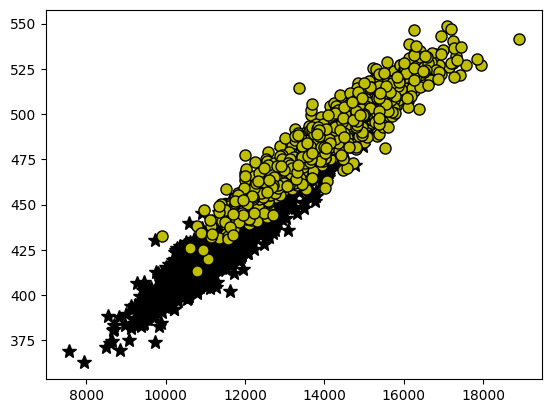

In [ ]:
# Plot Boundary
utils.plotDecisionBoundary(plotData, theta, X, y)
plt.show()
#28 is know from where?

In [ ]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    p = np.round(sigmoid(np.dot(X,theta)))
    
    
    # ============================================================
    return p

In [ ]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85, 49, 83, 79, 69, 96], theta)) #ต้องเพิ่มให้มีขนาดเท่ากับ X
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 1.000
Expected value: 0.775 +/- 0.002

Train Accuracy: 93.62 %
Expected accuracy (approx): 89.00 %
